# quant-econ Solutions: Estimation of Spectra

Solutions for http://quant-econ.net/py/estspec.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import ARMA, periodogram, ar_periodogram

## Exercise 1

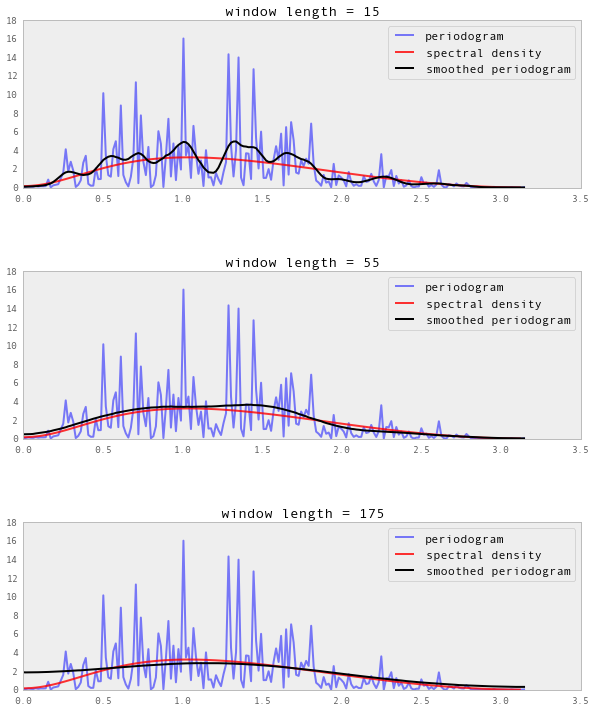

In [3]:

## Data
n = 400
phi = 0.5
theta = 0, -0.8
lp = ARMA(phi, theta)
X = lp.simulation(ts_length=n)

fig, ax = plt.subplots(3, 1, figsize=(10, 12))

for i, wl in enumerate((15, 55, 175)):  # window lengths
    
    x, y = periodogram(X)
    ax[i].plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')

    x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
    ax[i].plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')

    x, y_smoothed = periodogram(X, window='hamming', window_len=wl)
    ax[i].plot(x, y_smoothed, 'k-', lw=2, label='smoothed periodogram')

    ax[i].legend()
    ax[i].set_title('window length = {}'.format(wl))


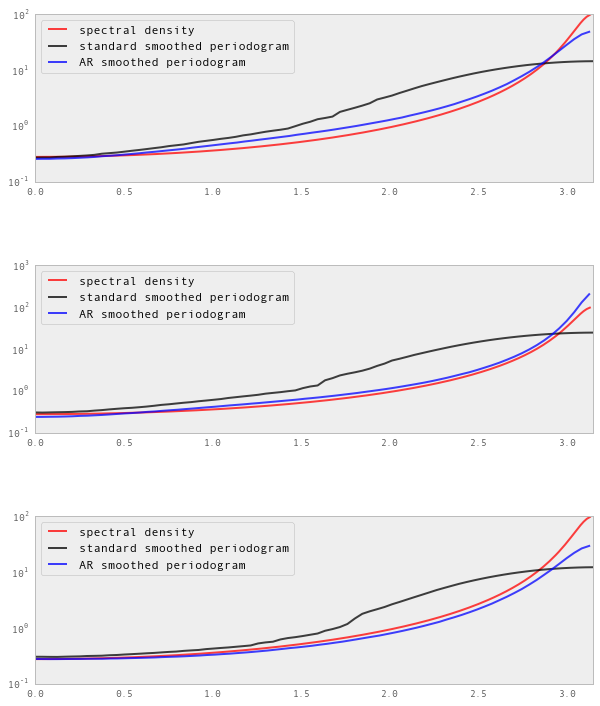

In [4]:
lp = ARMA(-0.9)
wl = 65


fig, ax = plt.subplots(3, 1, figsize=(10,12))

for i in range(3):
    X = lp.simulation(ts_length=150)
    ax[i].set_xlim(0, np.pi)

    x_sd, y_sd = lp.spectral_density(two_pi=False, res=180)
    ax[i].semilogy(x_sd, y_sd, 'r-', lw=2, alpha=0.75, label='spectral density')

    x, y_smoothed = periodogram(X, window='hamming', window_len=wl)
    ax[i].semilogy(x, y_smoothed, 'k-', lw=2, alpha=0.75, label='standard smoothed periodogram')

    x, y_ar = ar_periodogram(X, window='hamming', window_len=wl)
    ax[i].semilogy(x, y_ar, 'b-', lw=2, alpha=0.75, label='AR smoothed periodogram')

    ax[i].legend(loc='upper left')


